<a href="https://colab.research.google.com/github/rahutchinson/cash_loss_risk/blob/master/Risk_for_Spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Goal for Project
 - to wake up every moring to a percent risk of a large purchase or lots of purchases  to try to fight spending!
 - use an unsupervised neural network

# Setup

In [93]:
#@title Initial Imports
import pandas as pd
import io
import datetime as dt
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  
  

In [94]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Cleansing



Below Cell is for engineering the data in to a workable format
  - Date
  - Money Spent

In [95]:
df_amex = pd.read_csv("gdrive/My Drive/Colab_Notebooks/AmexNew2019-5.csv", header=None, usecols=[0,7])
df_amex.columns = ['date', 'cost']
df_amex.cost = pd.to_numeric(df_amex.cost)
df_amex = df_amex[df_amex.cost>0]
df_amex['date'] = df_amex.date.apply(lambda x: pd.to_datetime(x))
df_amex['moneys'] = df_amex.cost
df_amex = df_amex[['date', 'moneys']]
df_amex.head()

,date,moneys
0,2017-04-04,7.12
1,2017-04-05,9.83
2,2017-04-05,23.46
3,2017-04-07,7.03
4,2017-04-07,1.18


In [96]:
df_chase = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/chase_new.CSV', error_bad_lines=False)
df_chase = df_chase[df_chase['Type'] == 'Sale']
df_chase['date'] = df_chase['Transaction Date'].apply(lambda x: pd.to_datetime(x))
df_chase['moneys'] = pd.to_numeric(df_chase['Amount'])
df_chase['moneys'] = df_chase['moneys'].apply(lambda x: abs(x))
df_chase = df_chase[['date', 'moneys']].copy()
df_chase.head()

,date,moneys
0,2019-05-02,193.30
1,2019-04-29,28.13
2,2019-04-29,3.00
4,2019-04-29,7.89
5,2019-04-25,594.30


# Data Processing
Take the data and tally it up based on:
  - Day of week
  - Day of year
  - Per Day

In [0]:
dfs = [df_chase,df_amex]
dict_all = {}
for df in dfs:
  df['dow'] = df['date'].dt.weekday_name
  df['doy'] = df['date'].apply(lambda x: x.timetuple().tm_yday)
  
  

   
metric = [0,0]

dow_count = {'Sunday': [0,0], 'Monday': [0,0], 'Tuesday': [0,0], 
             'Wednesday': [0,0], 'Thursday': [0,0], 'Friday': [0,0],
             'Saturday': [0,0]}

for dow in dow_count:
  for df in dfs:
    dow_count[dow][0] += df[df['dow'] == dow].count()['dow']
    dow_count[dow][1] += df[df['dow'] == dow].sum()['moneys']
doy_counts = {}
for i in range(0,366):
  doy_counts[i] = [0,0]
for day in doy_counts:
  for df in dfs:
    doy_counts[day][0] += df[df['doy'] == day].count()['doy']
    doy_counts[day][1] += df[df['doy'] == day].sum()['moneys']

count_dow=[]
dollas_dow=[]
for day in dow_count:
  count_dow.append(dow_count.get(day)[0])
  dollas_dow.append(dow_count.get(day)[1])    
    

count_doy=[]
dollas_doy=[]
for day in doy_counts:
  count_doy.append(doy_counts.get(day)[0])
  dollas_doy.append(doy_counts.get(day)[1])
  
  
overall_df = pd.concat(dfs)

# Data Visualized

In [98]:
#@title Day of Week
counts = go.Scatter(
    x = ['sunday','monday','tue','wed','thur','fri','sat'],
    y = count_dow,
    name="Number of Purchases"
)

money = go.Scatter(
    x = ['sunday','monday','tue','wed','thur','fri','sat'],
    y = dollas_dow,
    name="moneys"
)
data = [counts, money]
configure_plotly_browser_state()
layout = go.Layout(
    yaxis2=dict(
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(counts, 1, 1)
fig.append_trace(money, 2, 1)

fig['layout'].update(height=600, width=800, title='Test')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [99]:
#@title Day of Year
counts = go.Scatter(
    x = list(doy_counts.keys()),
    y = count_doy,
    name="dates"
)

money = go.Scatter(
    x = list(doy_counts.keys()),
    y = dollas_doy,
    name="moneys",
    yaxis='y2'
)
data = [counts, money]
configure_plotly_browser_state()
layout = go.Layout(
    title='When I Buy and How much',
    yaxis=dict(
        title='Amount of Purchases'
    ),
    yaxis2=dict(
        title='Amount of money spent',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(counts, 1, 1)
fig.append_trace(money, 2, 1)

fig['layout'].update(height=600, width=800, title='Test')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [110]:

counts = go.Scatter(
    x = overall_df['date'],
    y = overall_df['moneys'],
    name="dates",
    mode = 'markers'
)

data = [counts]
configure_plotly_browser_state()
layout = go.Layout(
    title='Overall',
    yaxis=dict(
        title='money spent'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Training


In [0]:
from fbprophet import Prophet

Data cleaning
  - Some simple outlier removal

In [0]:
train_df = overall_df[['date', 'moneys']].copy()
train_df = train_df[train_df['moneys'] < 100]

In [118]:
train_df.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2074,2020-04-27,27.737203,4.830146,54.567406
2075,2020-04-28,22.635567,-0.783433,46.267806
2076,2020-04-29,25.201191,2.759767,48.971539
2077,2020-04-30,24.212440,-0.594409,48.710507
2078,2020-05-01,24.776912,-0.190372,47.843221


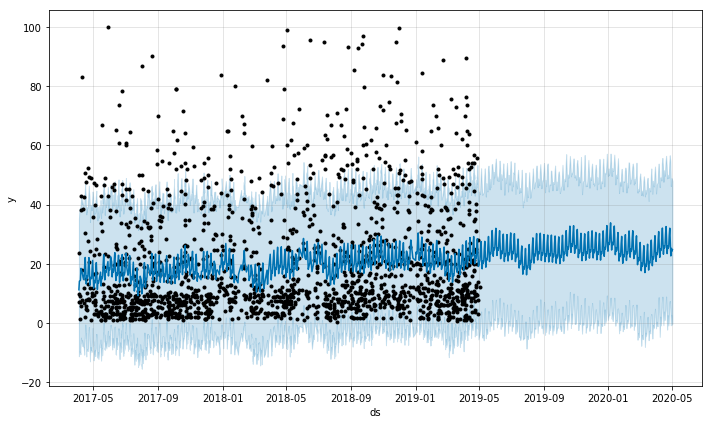

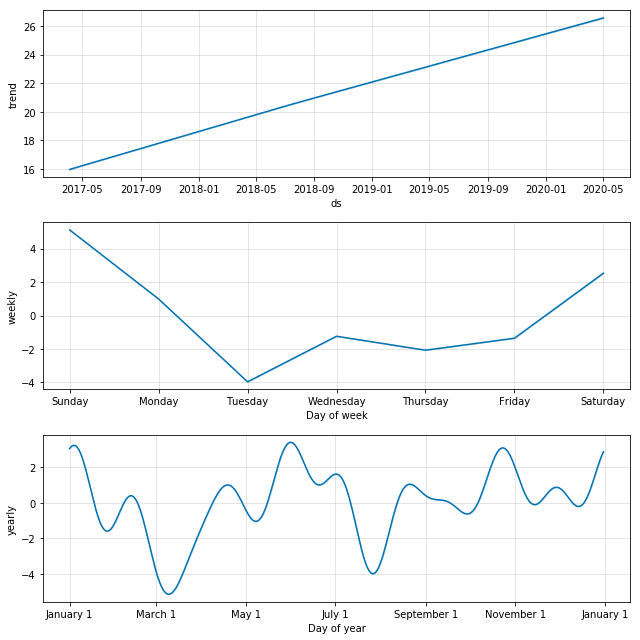

In [119]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
